      LOAN APPROVAL PREDICTION PROJECT        
      NM PROJECT – GOOGLE COLAB               

Loading Dataset...

First 5 Rows:
   Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0    Male      No           2  Not Graduate            No             3970   
1  Female     Yes           3  Not Graduate           Yes             7806   
2    Male     Yes           1  Not Graduate           Yes             8142   
3    Male     Yes           3  Not Graduate           Yes            14014   
4    Male     Yes           3      Graduate            No             4819   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               4164         482               300               1   
1               2346         325               180               1   
2               5039         254               180               0   
3               4897         386               240               0   
4               6439         487               180  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Accuracy (Balanced): 0.725

Random Forest Confusion Matrix:
[[  0  55]
 [  0 145]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.72      1.00      0.84       145

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200


Generating Graphs...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


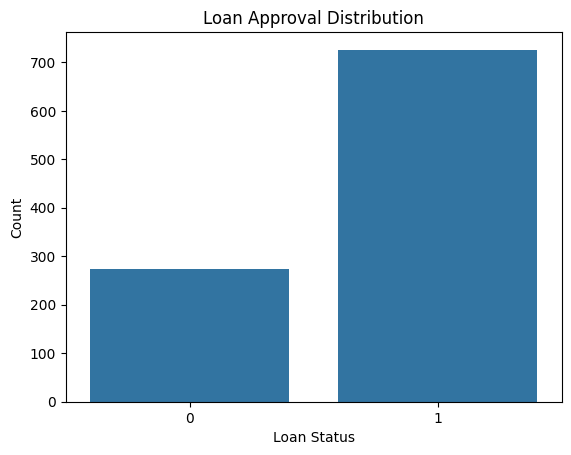

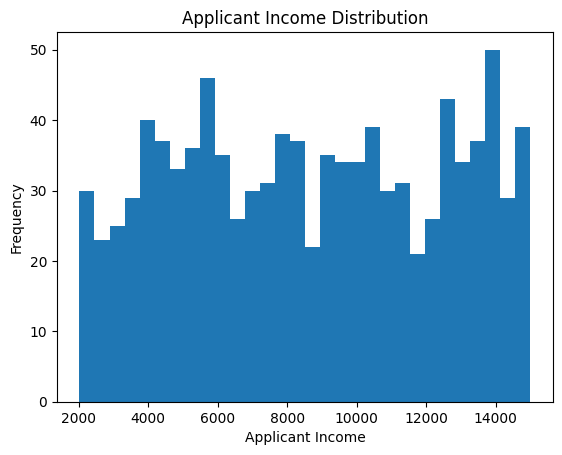

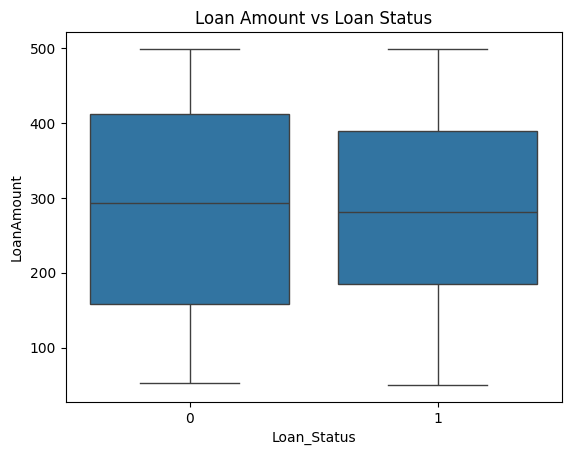

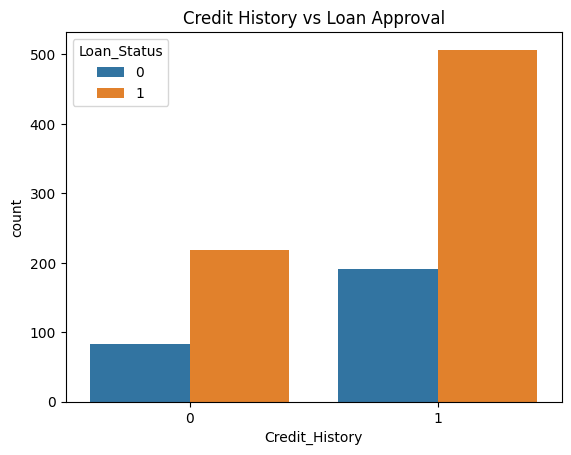

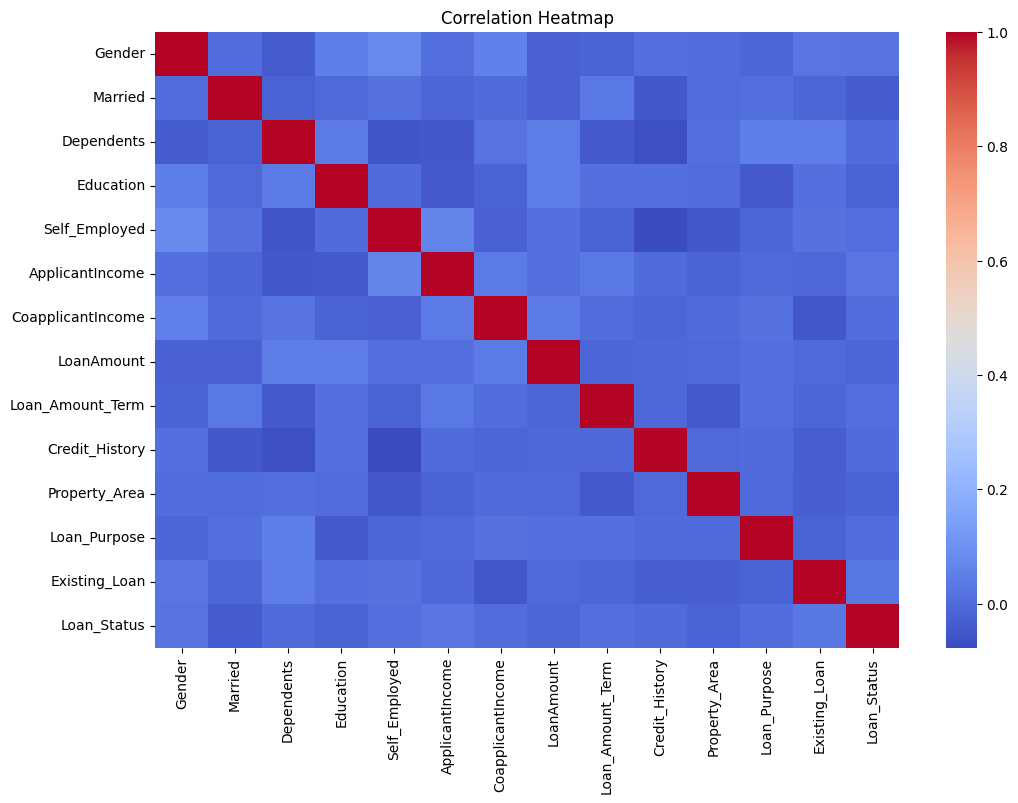

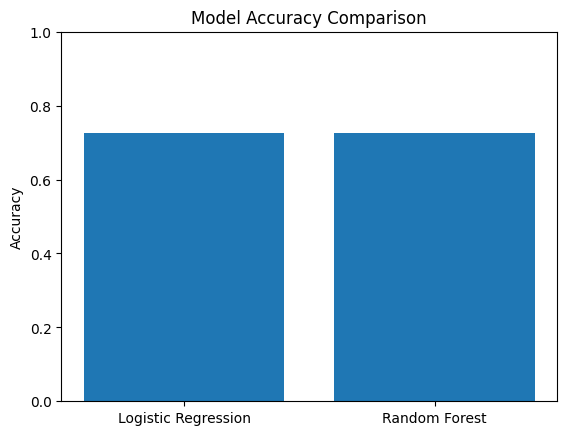


 PROJECT EXECUTED 
 BEST MODEL: RANDOM FOREST CLASSIFIER 
 Model performance evaluated successfully 



In [5]:
# ================================
# IMPORTING LIBRARIES
# ================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# ================================
# PROJECT INTRODUCTION
# ================================
print("==============================================")
print("      LOAN APPROVAL PREDICTION PROJECT        ")
print("      NM PROJECT – GOOGLE COLAB               ")
print("==============================================")

# ================================
# LOADING DATASET
# ================================
print("\nLoading Dataset...")
df = pd.read_csv("loan_data_1000.csv")

print("\nFirst 5 Rows:")
print(df.head())

print("\nLast 5 Rows:")
print(df.tail())

print("\nDataset Shape:")
print(df.shape)

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Description:")
print(df.describe(include="all"))

# ================================
# DATA PREPROCESSING
# ================================
print("\nEncoding Categorical Columns...")
le = LabelEncoder()

categorical_columns = [
    "Gender",
    "Married",
    "Education",
    "Self_Employed",
    "Property_Area",
    "Loan_Purpose",
    "Existing_Loan",
    "Loan_Status"
]

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Dataset Preview:")
print(df.head())

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

print("\nFeature Shape:", X.shape)
print("Target Shape:", y.shape)

# ================================
# SPLITTING DATA
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# ================================
# FEATURE SCALING
# ================================
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeature Scaling Completed")

# ================================
# TRAINING LOGISTIC REGRESSION MODEL
# ================================
print("\nTraining Logistic Regression Model...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)

print("\nLogistic Regression Accuracy:", lr_accuracy)

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

# ================================
# TRAINING RANDOM FOREST CLASSIFIER
# ================================
print("\nTraining Random Forest Classifier (Balanced)...")

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Accuracy (Balanced):", rf_accuracy)

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# ================================
# DATA VISUALIZATION
# ================================
print("\nGenerating Graphs...")

plt.figure()
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(df["ApplicantIncome"], bins=30)
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

plt.figure()
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

plt.figure()
sns.countplot(x="Credit_History", hue="Loan_Status", data=df)
plt.title("Credit History vs Loan Approval")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

model_names = ["Logistic Regression", "Random Forest"]
accuracy_values = [lr_accuracy, rf_accuracy]

plt.figure()
plt.bar(model_names, accuracy_values)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# ================================
# PROJECT COMPLETION
# ================================
print("\n==============================================")
print(" PROJECT EXECUTED ")
print(" BEST MODEL: RANDOM FOREST CLASSIFIER ")
print(" Model performance evaluated successfully ")
print("\n ===============================================")
